1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

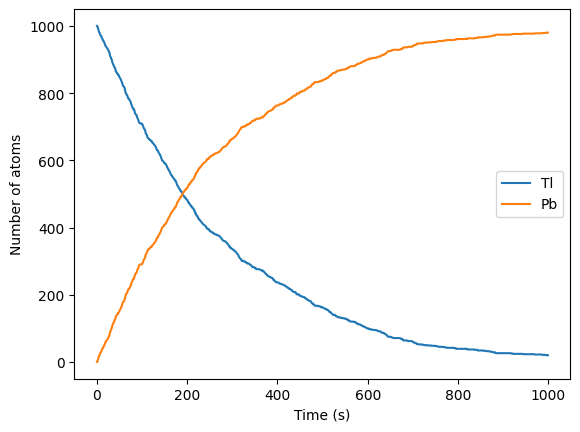

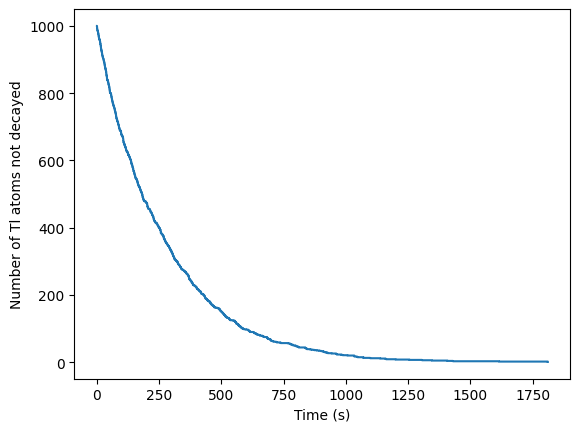

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N0 = 1000  # initial number of Tl atoms
tau = 3.052 * 60  # half-life in seconds
dt = 1  # time step in seconds
t_max = 1000  # maximum time in seconds

# Method 1: Time stepping
N_Tl = N0  # number of Tl atoms
N_Pb = 0  # number of Pb atoms
N_Tl_list = [N_Tl]  # list to store number of Tl atoms at each time step
N_Pb_list = [N_Pb]  # list to store number of Pb atoms at each time step

for t in range(dt, t_max, dt):
    decayed = np.sum(np.random.random(N_Tl) < 1 - 2**(-dt/tau))  # number of Tl atoms that decayed
    N_Tl -= decayed
    N_Pb += decayed
    N_Tl_list.append(N_Tl)
    N_Pb_list.append(N_Pb)

plt.figure()
plt.plot(range(0, t_max, dt), N_Tl_list, label='Tl')
plt.plot(range(0, t_max, dt), N_Pb_list, label='Pb')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()

# Method 2: Inverse transform method
decay_times = -tau * np.log2(1 - np.random.random(N0))  # times of decay of the Tl atoms
decay_times.sort()  # sort the decay times in ascending order
N_not_decayed = N0 - np.arange(N0)  # number of atoms that have not decayed

plt.figure()
plt.step(decay_times, N_not_decayed, where='post')
plt.xlabel('Time (s)')
plt.ylabel('Number of Tl atoms not decayed')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

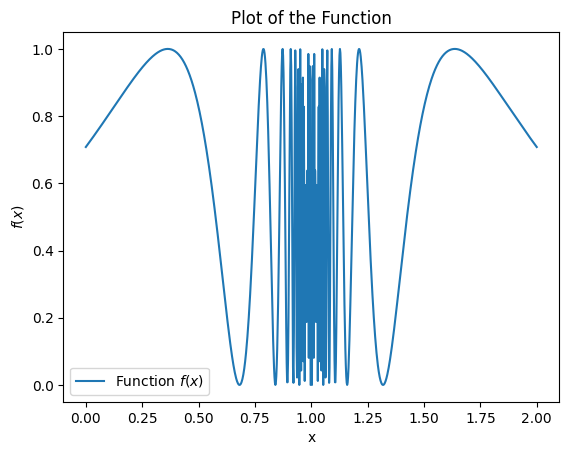

Hit/Miss Method:
Integral Estimate: 1.3498, Error: 0.009368244019025123
Mean Value Method:
Integral Estimate: 1.3542237520389522, Error: 0.006482221696171143


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(1 / (1 - x))**2

# Function for hit/miss method
def monte_carlo_hit_miss(func, a, b, N):
    x_vals = np.random.uniform(a, b, N)
    y_vals = np.random.uniform(0, 1, N)

    integral_estimate = (b - a) * np.mean(func(x_vals) > y_vals)
    error = (b - a) * np.std(func(x_vals) > y_vals) / np.sqrt(N)

    return integral_estimate, error

# Function for mean value method
def monte_carlo_mean_value(func, a, b, N):
    x_vals = np.random.uniform(a, b, N)

    integral_estimate = (b - a) * np.mean(func(x_vals))
    error = (b - a) * np.std(func(x_vals)) / np.sqrt(N)

    return integral_estimate, error

# Plot the function
x_vals_plot = np.linspace(0, 2, 1000)
plt.plot(x_vals_plot, f(x_vals_plot), label='Function $f(x)$')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.title('Plot of the Function')
plt.legend()
plt.show()

# Parameters for Monte Carlo integration
a = 0
b = 2
N = 10000  # Number of samples

# Monte Carlo integration using hit/miss method
integral_hit_miss, error_hit_miss = monte_carlo_hit_miss(f, a, b, N)
print(f"Hit/Miss Method:\nIntegral Estimate: {integral_hit_miss}, Error: {error_hit_miss}")

# Monte Carlo integration using mean value method
integral_mean_value, error_mean_value = monte_carlo_mean_value(f, a, b, N)
print(f"Mean Value Method:\nIntegral Estimate: {integral_mean_value}, Error: {error_mean_value}")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if a point is inside the unit circle in 2D
def inside_circle(x, y):
    return x**2 + y**2 <= 1

# Function to compute the area of a unit circle using Monte Carlo integration
def monte_carlo_circle_area(N):
    x_vals = np.random.uniform(-1, 1, N)
    y_vals = np.random.uniform(-1, 1, N)

    inside_points = inside_circle(x_vals, y_vals)
    area_estimate = 4 * np.mean(inside_points)  # Factor of 4 to account for the entire unit square

    return area_estimate

# Function to compute the volume of a unit sphere in 10D using Monte Carlo integration
def monte_carlo_sphere_volume(N, dim):
    points = np.random.uniform(-1, 1, size=(N, dim))
    inside_points = np.linalg.norm(points, axis=1) <= 1

    volume_estimate = 2**dim * np.mean(inside_points)  # Factor of 2^dim to account for the entire hypercube

    return volume_estimate

# Compute the area of a unit circle
N_circle = 10000  # Number of samples
area_estimate_circle = monte_carlo_circle_area(N_circle)
print(f"Area of the Unit Circle: {area_estimate_circle}")

# Generalize the result for a 10D sphere
N_sphere = 10000  # Number of samples
dim_sphere = 10  # Dimension of the sphere
volume_estimate_sphere = monte_carlo_sphere_volume(N_sphere, dim_sphere)
print(f"Volume of the 10D Unit Sphere: {volume_estimate_sphere}")

Area of the Unit Circle: 3.134
Volume of the 10D Unit Sphere: 2.7648


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [13]:
import numpy as np

# Function to calculate the integrand
def integrand(x):
    return x**(-0.5) / (np.exp(x) + 1)

# Importance sampling weight function
def weight_function(x):
    return 1 / np.sqrt(x)

# Monte Carlo integration with importance sampling
def monte_carlo_importance_sampling(N):
    samples = np.random.uniform(0, 1, N)
    weights = weight_function(samples)
    integral_estimate = np.mean(integrand(samples) / weights)

    return integral_estimate

# Number of samples
N_samples = 100000

# Perform Monte Carlo integration with importance sampling
result = monte_carlo_importance_sampling(N_samples)

# Expected result is around 0.84
print(f"Monte Carlo Integration Result: {result}")


Monte Carlo Integration Result: 0.37962258769709895
